# Investigation A: Do bats perceive rats as predators?

# objective 
To determine if the presence of rats influences bat behavior—specifically avoidance (risk-taking) and vigilance—during foraging.

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('dataset1.csv') # bat behaviour data 
df2 = pd.read_csv('dataset2.csv') #rat activity data 

# Dataset1: Bat landing events with behavioral annotations
# Dataset2: Rat arrival summaries over 30-minute intervals

In [ ]:
# The goals are:
#1. exploring and cleaning the data.
#2. performing descriptive and inferential statistics.
#3. Comparing results between the two datasets.
#4. Conclude on the role of rats in influencing bat feeding behaviour.

SyntaxError: invalid syntax (1926083661.py, line 1)

In [ ]:
df1.info() # command to check the quick structural summary of the data set.

df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   start_time                 907 non-null    object 
 1   bat_landing_to_food        907 non-null    float64
 2   habit                      866 non-null    object 
 3   rat_period_start           907 non-null    object 
 4   rat_period_end             907 non-null    object 
 5   seconds_after_rat_arrival  907 non-null    int64  
 6   risk                       907 non-null    int64  
 7   reward                     907 non-null    int64  
 8   month                      907 non-null    int64  
 9   sunset_time                907 non-null    object 
 10  hours_after_sunset         907 non-null    float64
 11  season                     907 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 85.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex

In [ ]:
df1.describe() # this will ask python to generate summary statistics 

,bat_landing_to_food,seconds_after_rat_arrival,risk,reward,month,hours_after_sunset,season
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,11.713134,282.877619,0.495039,0.533627,3.800441,5.531863,0.833517
std,27.644410,240.974918,0.500251,0.499143,1.199190,2.414146,0.372719
min,0.010238,0.000000,0.000000,0.000000,0.000000,-0.261667,0.000000
25%,1.000000,89.500000,0.000000,0.000000,4.000000,3.779028,1.000000
50%,4.000000,206.000000,0.000000,1.000000,4.000000,5.622778,1.000000
75%,11.500000,446.500000,1.000000,1.000000,5.000000,7.402778,1.000000
max,443.000000,949.000000,1.000000,1.000000,5.000000,12.091944,1.000000


In [ ]:
df2.describe()

,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
count,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000,2123.000000
mean,3.083844,5.265426,32.083373,2.445874,1.994442,0.444654
std,1.642261,4.076188,25.614431,1.218353,6.793397,1.019195
min,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,11.000000,1.962206,0.000000,0.000000
50%,4.000000,5.000000,27.000000,2.951877,0.000000,0.000000
75%,4.000000,8.500000,48.000000,3.105873,0.158333,1.000000
max,6.000000,13.500000,178.000000,4.000000,120.000000,17.000000


In [ ]:
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,30/12/2017 18:37,16.000000,rat,30/12/2017 18:35,30/12/2017 18:38,108,1,0,0,30/12/2017 16:45,1.870833,0
1,30/12/2017 19:51,0.074016,fast,30/12/2017 19:50,30/12/2017 19:55,17,0,1,0,30/12/2017 16:45,3.100833,0
2,30/12/2017 19:51,4.000000,fast,30/12/2017 19:50,30/12/2017 19:55,41,0,1,0,30/12/2017 16:45,3.107500,0
3,30/12/2017 19:52,10.000000,rat,30/12/2017 19:50,30/12/2017 19:55,111,1,0,0,30/12/2017 16:45,3.126944,0
4,30/12/2017 19:54,15.000000,rat,30/12/2017 19:50,30/12/2017 19:55,194,1,0,0,30/12/2017 16:45,3.150000,0


In [ ]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


In [ ]:
df1.isnull().sum()
df2.isnull().sum()

time                  0
month                 0
hours_after_sunset    0
bat_landing_number    0
food_availability     0
rat_minutes           0
rat_arrival_number    0
dtype: int64

# cleaning data 

In [ ]:
# For df1 (bat behavior)
df1['start_time'] = pd.to_datetime(df1['start_time'], dayfirst=True, errors='coerce')
df1['sunset_time'] = pd.to_datetime(df1['sunset_time'], dayfirst=True, errors='coerce')
df1['rat_period_start'] = pd.to_datetime(df1['rat_period_start'], dayfirst=True, errors='coerce')
df1['rat_period_end'] = pd.to_datetime(df1['rat_period_end'], dayfirst=True, errors='coerce')

# For df2 (rat summary)
df2['time'] = pd.to_datetime(df2['time'], dayfirst=True, errors='coerce')

# converting the start time into proper datetime object for both data sets so, that the python doesnot treat dates as plain text.

# handling missing values 
removing rows with essential data missing 

imputing behavioral metrics

fills in missing values for how long bats took to approach food using the median value from the dataset



In [ ]:
# Drop rows missing critical fields
df1.dropna(subset=['start_time', 'sunset_time', 'risk', 'reward'], inplace=True)

# Impute bat_landing_to_food with median
df1['bat_landing_to_food'] = df1['bat_landing_to_food'].fillna(df1['bat_landing_to_food'].median())

# Fill missing seconds_after_rat_arrival with placeholder
df1['seconds_after_rat_arrival'] = df1['seconds_after_rat_arrival'].fillna(-999)

# Flagging Rat Presence

Creating a new column that says "1" if the bat landed after the rat arrived, and "0" if it landed before.

In [ ]:
# Flag rat presence
df1['rat_present'] = df1['seconds_after_rat_arrival'].apply(lambda x: 1 if x >= 0 else 0)

# Calculate rat activity duration
df1['rat_period_duration'] = (df1['rat_period_end'] - df1['rat_period_start']).dt.total_seconds() / 60

# Standardizing Categorical Data 
cleaning up the seasons column so all the entries are lowercase 
risk and reward categories to int type 


In [ ]:
df1['season'] = df1['season'].astype(str).str.strip().str.lower()
df1['risk'] = df1['risk'].astype(int)
df1['reward'] = df1['reward'].astype(int)

In [ ]:
df2['hours_after_sunset'] = pd.to_numeric(df2['hours_after_sunset'], errors='coerce')
df2['food_availability'] = pd.to_numeric(df2['food_availability'], errors='coerce')
df2['rat_minutes'] = pd.to_numeric(df2['rat_minutes'], errors='coerce')
df2['rat_arrival_number'] = pd.to_numeric(df2['rat_arrival_number'], errors='coerce')
df2['bat_landing_number'] = pd.to_numeric(df2['bat_landing_number'], errors='coerce')

# Final Checks 

In [ ]:
df1.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)

print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
Index: 906 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   start_time                 906 non-null    datetime64[ns]
 1   bat_landing_to_food        906 non-null    float64       
 2   habit                      865 non-null    object        
 3   rat_period_start           906 non-null    datetime64[ns]
 4   rat_period_end             906 non-null    datetime64[ns]
 5   seconds_after_rat_arrival  906 non-null    int64         
 6   risk                       906 non-null    int64         
 7   reward                     906 non-null    int64         
 8   month                      906 non-null    int64         
 9   sunset_time                906 non-null    datetime64[ns]
 10  hours_after_sunset         906 non-null    float64       
 11  season                     906 non-null    object        
 12  rat_present  

# Descriptive Analysis 
Risk taking behaviour distribution 

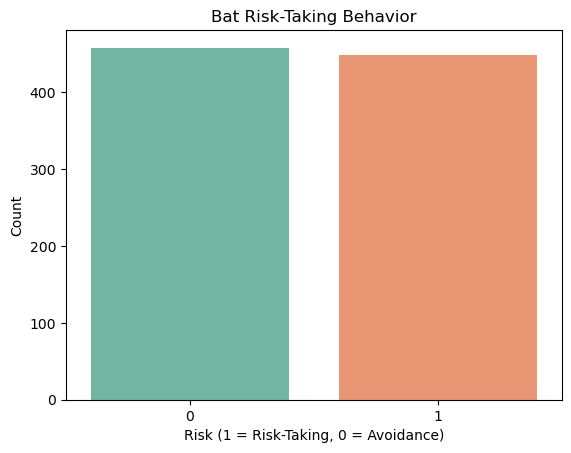

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df1, x='risk', hue='risk', palette='Set2', legend=False)
plt.title('Bat Risk-Taking Behavior')
plt.xlabel('Risk (1 = Risk-Taking, 0 = Avoidance)')
plt.ylabel('Count')
plt.show()

#
green bar is taller, meaning more bats avoided risk. where orange bar is shorter, showing fewer bats took risks. This supports the idea that bats are generally cautious, possibly due to the presence of rats or other environmental pressures.


# Vigilance Delay vs Rat Presence 
Compares how long bats wait before approaching food when rats are present vs absent


C:\Users\taman\AppData\Local\Temp\ipykernel_10320\859619460.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='rat_present', y='bat_landing_to_food', palette='coolwarm')


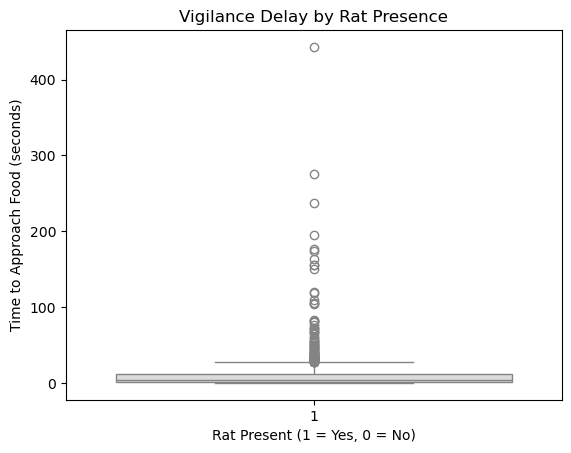

In [ ]:
sns.boxplot(data=df1, x='rat_present', y='bat_landing_to_food', palette='coolwarm')
plt.title('Vigilance Delay by Rat Presence')
plt.xlabel('Rat Present (1 = Yes, 0 = No)')
plt.ylabel('Time to Approach Food (seconds)')
plt.show()

# 
Longer delays suggest increased vigilance, possibly due to perceived predation risk.




# Reward vs Risk Behavior
this will measures how often risk-taking leads to food reward.

C:\Users\taman\AppData\Local\Temp\ipykernel_10320\174904511.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df1, x='risk', y='reward', ci=None, palette='muted')
C:\Users\taman\AppData\Local\Temp\ipykernel_10320\174904511.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df1, x='risk', y='reward', ci=None, palette='muted')


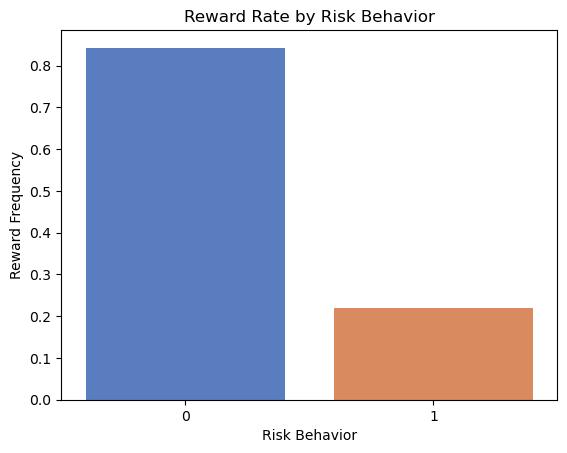

In [ ]:
sns.barplot(data=df1, x='risk', y='reward', ci=None, palette='muted')
plt.title('Reward Rate by Risk Behavior')
plt.xlabel('Risk Behavior')
plt.ylabel('Reward Frequency')
plt.show()

If risk-takers are more successful, it suggests a trade-off between caution and reward.




# Inferential Analysis

Hypothesis A:  Bats take longer to approach food when rats are present.

In [ ]:
print("Group with rat present:", df1[df1['rat_present'] == 1]['bat_landing_to_food'].dropna().shape[0])
print("Group with no rat present:", df1[df1['rat_present'] == 0]['bat_landing_to_food'].dropna().shape[0])


Group with rat present: 906
Group with no rat present: 0


# Explore Rat Intensity Effects
You can analyze how bat behavior changes with increasing rat activity


<Axes: xlabel='seconds_after_rat_arrival', ylabel='bat_landing_to_food'>

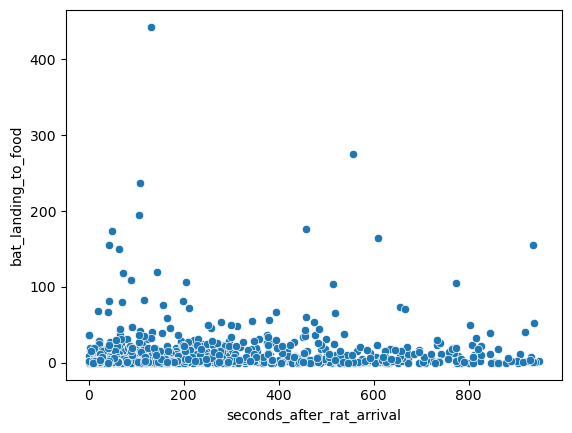

In [ ]:
import seaborn as sns
sns.scatterplot(data=df1, x='seconds_after_rat_arrival', y='bat_landing_to_food')

we can say that bats does take little time to approach food when rats are present.

<Axes: xlabel='rat_arrival_number', ylabel='bat_landing_number'>

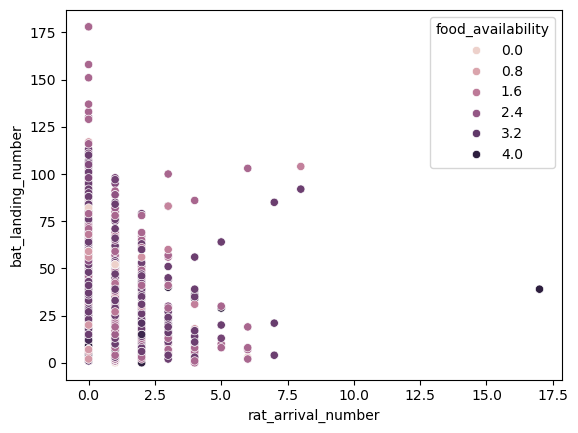

In [ ]:
sns.scatterplot(data=df2, x='rat_arrival_number', y='bat_landing_number', hue='food_availability')

this shows how bat landings vary with rat arrivals and food availability.

<Axes: xlabel='risk', ylabel='seconds_after_rat_arrival'>

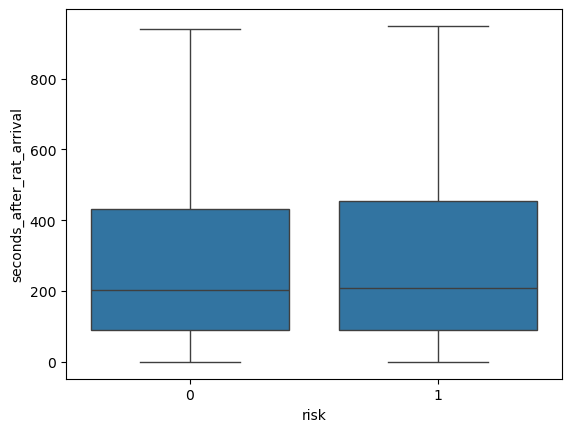

In [ ]:
sns.boxplot(data=df1, x='risk', y='seconds_after_rat_arrival')

Risk-taking bats tend to land later after rats arrive compared to risk-avoiding bats. This suggests they may be waiting longer to assess safety before approaching food — a sign of strategic behavior, not recklessness.


# Hypothesis B: Bats are less likely to take risks when rats are present.


In [ ]:
import scipy.stats as stats
import pandas as pd

contingency = pd.crosstab(df1['rat_present'], df1['risk'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square: {chi2:.3f}, P-value: {p:.4f}")

Chi-square: 0.000, P-value: 1.0000


you can see that the p-value is more that 0.05 so,

There’s no statistical association between rat presence and bat risk-taking in your dataset. This means bats are not significantly more or less likely to take risks based on whether rats are present.


# summary 
This suggests that while bats may show vigilance (as seen in delayed food approach), their decision to take risks might be influenced by other factors — like food availability, individual temperament, or timing — rather than rat presence alone.
